# Beispiel 17.6: Dynamisches Verhalten eines adiabatischen Rohrreaktors

Bearbeitet von Alexander Zirn

Dieses Beispiel befindet sich im Lehrbuch auf der Seite 260-263. Die Nummerierung der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch.

# 1. Bilanzgleichungen

Um ein Modell des gesamten Reaktors zu erhalten, müssen gleichzeitig diffusive Prozesse innerhalb des Katalysatorpellets (Mesoskala) sowie konvektive Stofftransportvorgänge (Makroskala) berücksichtigt werden. Dazu wird die dimensionslose Bilanz des Katalysatorpellets mit der des Reaktors gekoppelt. 

## 1.1 Bilanzierung der Makroskala

Die dimensionslose Materialbilanz der Komponente $A_1$ und die Energiebilanz für einen adiabaten Festbettreaktors ergibt sich aus Gleichung 17.41 zu:

\begin{align}
\frac{\partial f_\mathrm{1,G}}{\partial \theta_\mathrm{G}}&=-\frac{\partial f_\mathrm{1,G}}{\partial \zeta}+\frac{1}{Bo_1}\frac{\partial f^2_\mathrm{1,G}}{\partial \zeta^2}-\left(a+1\right)\frac{1-\epsilon_\mathrm{G}}{\epsilon_\mathrm{G}}\frac{Bi_\mathrm{1,m}\,Da_1}{\phi^2}\left(f_\mathrm{1,G}-f_\mathrm{1,Kat}\right),\tag{17.41a}\\
\frac{\partial\vartheta_\mathrm{G}}{\partial \theta_\mathrm{G}}&=-\frac{\partial \vartheta_\mathrm{G}}{\partial \zeta}+\frac{1}{Pe}\frac{\partial^2 \vartheta_\mathrm{G}}{\partial \zeta^2}-St_\mathrm{G}\left(\vartheta_\mathrm{G}-\overline{\vartheta}_\mathrm{Kat}\right)\tag{1}.
\end{align}

Analog zu Tabelle 17.2 folgen die Randbedingungen:

\begin{align}
\zeta=0: \quad 0&= \frac{\partial f_\mathrm{1,G}}{\partial \zeta} -Bo_1 \left(f_\mathrm{1,G}-1\right)\tag{2}\\
0&= \frac{\partial \vartheta_\mathrm{G}}{\partial \zeta}-Pe\left(\vartheta_\mathrm{G}-1\right)\tag{3}\\
\zeta=1: \quad 0 &= \frac{\partial f_\mathrm{1,G}}{\partial \zeta}\tag{4}\\
0&= \frac{\partial \vartheta_\mathrm{G}}{\partial \zeta}\tag{5}
\end{align}

Mit Python können partielle Differenzialgleichungen (PDEs) nicht direkt gelöst werden. Die Finite-Differenzen-Methode wird verwendet, um die PDEs in ein gewöhnliches Differenzialgleichungssystem (ODEs) zu überführen. Hierbei wird die explizite Finite-Differenzen-Methode angewendet: Axiale Gradienten werden dabei durch die Approximation durch die rechtsseitige Differenz ausgedrückt.  

Damit ergibt sich für die Bilanzgleichungen:
\begin{align}
\frac{\partial f_\mathrm{1,G}[k]}{\partial \theta_\mathrm{G}}&=-\frac{ f_\mathrm{1,G}[k+1]-f_\mathrm{1,G}[k]}{\Delta \zeta}+\frac{1}{Bo_1}\frac{f_\mathrm{1,G}[k+1]-2f_\mathrm{1,G}[k]+f_\mathrm{1,G}[k-1]}{\Delta \zeta^2}-\left(a+1\right)\frac{1-\epsilon_\mathrm{G}}{\epsilon_\mathrm{G}}\frac{Bi_\mathrm{1,m}\,Da_1}{\phi^2}\left(f_\mathrm{1,G}[k]-f_\mathrm{1,Kat}\right),\tag{6}\\
\frac{\partial\vartheta_\mathrm{G}[k]}{\partial \theta_\mathrm{G}}&=-\frac{ \vartheta_\mathrm{G}[k+1]-\vartheta_\mathrm{G}[k]}{\Delta \zeta}+\frac{1}{Pe}\frac{\vartheta_\mathrm{G}[k+1]-2\vartheta_\mathrm{G}[k]+\vartheta_\mathrm{G}[k-1]}{\Delta \zeta^2}-St_\mathrm{G}\left(\vartheta_\mathrm{G}[k]-\overline{\vartheta}_\mathrm{Kat}\right)\tag{7}.
\end{align}

Darin bezeichnet die Laufvariable $k$ die jeweilige Stützstelle entlang der Reaktorkoordinate $z$.

Analog wird mit den Randbedingungen verfahren.
\begin{align}
\zeta=0: \quad 0 &= \frac{f_\mathrm{1,G}[0]-f_\mathrm{1,G}[-1]}{\Delta \zeta}-Bo_1 \left(f_\mathrm{1,G}[0]-1\right)\tag{8}\\
0&= \frac{ \vartheta_\mathrm{G}[0]-\vartheta_\mathrm{G}[-1]}{\Delta \zeta}-Pe\left(\vartheta_\mathrm{G}[0]-1\right)\tag{9}\\
\zeta=1: \quad 0&=\frac{f_\mathrm{1,G}[N+1]-f_\mathrm{1,G}[N]}{\Delta \zeta} \tag{10}\\
0&=\frac{ \vartheta_\mathrm{G}[N+1]-\vartheta_\mathrm{G}[N]}{\Delta \zeta}\tag{11}
\end{align}

Im Weiteren werden die Randbedinungen für $k = 0$ sowie $k = N$ in die Bilanzgleichungen eingesetzt. Das resultierende Differenzialgleichungssystem ist in der Funktion "pde_system" implementiert.

In [30]:
# system of partial differential equations

def pde_system(t, y):
    """ partial differential equation system

    Parameters
    ----------
    t : array
        dimensionless time in 1
    y : array
        dimensionless concentration and temperature in 1

    Returns
    -------
    array
        first temporal derivatives of function variables in 1
    """
    
    # numerical parameters for function 
    N = N_disc_z - 1 # counting variable for number of ODEs
    
    # definition of empty vectors
    df_dtheta   = np.zeros(N_disc_z) # empty vector for all ODEs
    dT_dtheta   = np.zeros(N_disc_z) # empty vector for all ODEs

    # renaming variables
    f    = y[0:N_disc_z]
    T    = y[N_disc_z:]

    # first guess values
    f_cat_L = np.zeros(N_disc_z)
    T_cat = np.ones(N_disc_z)
   

    for k in np.arange(0, N_disc_z):
        # 1. iteration
        sol_flat_1 = solve_mesoscale(f[k], T_cat[k]) # solving mesoscale with guessed catalyst temperature
        T_cat[k]   = T_mean(sol_flat_1, T_cat[k], T[k]) # mean catalyst temperature

        # 2. iteration
        sol_flat_2 = solve_mesoscale(f[k], T_cat[k]) # solving mesoscale with catalyst temperature after 1 iteration
        T_cat[k]   = T_mean(sol_flat_2, T_cat[k], T[k]) # mean catalyst temperature

        f_cat_L[k] = sol_flat_2.y[0,-1] # catalyst surface concentration

    
    # resulting ODEs according to finite difference method
    ## material balances
    df_dtheta[0] = -(f[1]-f[0])/dz + 1/(Bo * dz**2)*(f[1] - f[0] - Bo * dz * (f[0] - 1)) -(a+1) * (1-eps)/eps * (Bi_m * Da) / phi**2 * (f[0] - f_cat_L[0]) # left boundary condition of mass balance

    for k in np.arange(1, N):
        df_dtheta[k] = -(f[k+1]-f[k])/dz+1/(Bo * dz**2)*(f[k+1] - 2*f[k] + f[k-1]) -(a+1) * (1-eps)/eps * (Bi_m * Da) / phi**2 * (f[k] - f_cat_L[k])  # mass balance transferred by FDM at position i  

    df_dtheta[N] = 1/(Bo * dz**2)*( - f[N] + f[N-1]) -(a+1) * (1-eps)/eps * (Bi_m * Da) / phi**2 * (f[N] - f_cat_L[N]) # right boundary condition of mass balance


    ## heat balances
    dT_dtheta[0] = -(T[1]-T[0])/dz + 1/(Pe * dz**2)*(T[1] - T[0] - Pe * dz * (T[0]-1)) - St * (T[0] - T_cat[0]) # left boundary condition of energy condition

    for k in np.arange(1, N):
        dT_dtheta[k] = -(T[k+1]-T[k])/dz + 1/(Pe * dz**2)*(T[k+1] - 2*T[k] + T[k-1]) - St * (T[k] - T_cat[k])  # energy balance transferred by FDM at position i 

    dT_dtheta[N] =  1/(Pe * dz**2)*(-T[N] + T[N-1]) - St * (T[N] - T_cat[N]) # right boundary condition of energy balance

    return np.hstack((df_dtheta, dT_dtheta))

## 1.2 Bilanzierung der Mesoskala

Die dimensionslose Materialbilanz eines Katalysatorpellets ist durch Gleichung (17.21a) gegeben. Mit den Annahmen eines isothermen, quasi-stationären Katalysatorpellets ebener Geometrie kann die Gleichung vereinfacht werden zu:
\begin{align}
\frac{\mathrm{d}^2 f_\mathrm{1,Kat}}{\mathrm{d}\chi^2}=\phi^2\,\omega_\mathrm{Kat}.\tag{17.25a}
\end{align} 

Damit die Materialbilanz in Python überführt werden kann, ist eine Substitution notwendig, sodass nur noch Ableitungen von maximal erster Ordnung vorliegen.
Daher wird definiert:
\begin{align}
f'_\mathrm{1,Kat}&= \frac{\mathrm{d}f_\mathrm{1,Kat}}{\mathrm{d}\chi},\tag{12}\\
\frac{\mathrm{d} f'_\mathrm{1,Kat}}{\mathrm{d} \chi}&=\phi^2\,\omega_\mathrm{Kat}.\tag{13}
\end{align}
Die resultierende Differentialgleichungssystem wird in Python mittels der Funktion `catalyst_balances` implementiert. Da das Pellet als isotherm angenommen wird, ist eine Energiebilanz nicht erforderlich. Allerdings wird die mittlere Katalysatortemperatur bei der Lösung der Materialbilanz benötigt und der Funktion als Argument übergeben.

In [31]:
def catalyst_balances(x, y, T_cat_k):
    """ function for material balances of catalyst pellet

    Parameters
    ----------
    x : array
        dimensional spacial coordinate for catalyst in 1
    y : array
        dimensionless concentration and first derivative in 1

    Returns
    -------
    array
        dimensionless first and second derivatives of concentration in 1
    """

    f_cat = y[0]    # transferring to local variable f, eq. 12
    df_catdx = y[1] # transferring to local variable f', eq. 13

    d2f_catdx2 = phi**2 * omega(f_cat, T_cat_k) # mass balance mesoscale

    sol = np.vstack((df_catdx, d2f_catdx2)) # stack the results

    return sol # return solution

Analog zu 17.21 ergeben sich die Randbedingungen wie folgt:
\begin{align}
\chi&=0: \quad 0=\frac{\mathrm{d}f_\mathrm{1,Kat}}{\mathrm{d}\chi},\tag{17.21b}\\
\chi&=1: \quad 0=\frac{\mathrm{d}f_\mathrm{1,Kat}}{\mathrm{d}\chi} - Bi_\mathrm{1,m}\left(f_\mathrm{1,G}-f_\mathrm{1,Kat}\right)\tag{17.21b}.
\end{align}
Diese werden in der Funktion `bc` implementiert. Auf der linken Seite wird die "Null" mit einer Variable ersetzt, wie es der eingesetzte Solver erwartet.

In [32]:
def bc(ya, yb, f_k):
    """ function for boundary conditions

    Parameters
    ----------
    ya : array
        function values at left boundary
    yb : array
        function values at right boundary

    Indices
    -------
    [0] : value
    [1] : first derivative

    Returns
    -------
    array
        boundary conditions at left and right boundary
    """

    bf_x_0 = ya[1]

    bf_x_L_R = yb[1] - Bi_m * (f_k - yb[0]) #bc @ pos x=L_R 
    
    return np.array([bf_x_0, bf_x_L_R]) # return solution

# 2. Reaktionsgeschwindigkeit

Die mittlere Katalysatortemperatur wird aus der Energiebilanz an der Katalysatoroberfläche abgeleitet. Dabei entspricht der Wärmestrom in Folge der Reaktion dem übertragenen Wärmestrom zwischen der Katalysatoroberfläche und dem Fluid (vgl. auch 17.35).
\begin{align}
\dot{Q}_\mathrm{R} &= \dot{Q}_\mathrm{ab}\tag{14}\\
-\Delta V_\mathrm{Kat}\,\Delta_\mathrm{R}H\,\overline{r}_\mathrm{Kat}&=h_\mathrm{G}\,\Delta A_\mathrm{G,Kat}\,\left(\overline{T}_\mathrm{Kat}-T_\mathrm{G}\right)\tag{17.35}
\end{align}
Umgeformt ergibt sich:
\begin{align}
\overline{T}_\mathrm{Kat} = T_\mathrm{G} -\frac{\Delta V_\mathrm{Kat}\,\Delta_\mathrm{R}H}{\Delta A_\mathrm{G,Kat}\,h_\mathrm{G}}\,\overline{r}_\mathrm{Kat}\tag{15}.
\end{align}
Mit $L = \frac{\Delta V_\mathrm{Kat}}{\Delta A_\mathrm{G,Kat}}$ sowie der Definition des Mittelwerts $\overline{r}_\mathrm{Kat} = \frac{1}{L}\int^L_0  r_\mathrm{Kat} \mathrm{d}x$ ergibt sich:
\begin{align}
\overline{T}_\mathrm{Kat} = T_\mathrm{G} -\frac{\Delta_\mathrm{R}H\,}{h_\mathrm{G}}\int^L_0  r_\mathrm{Kat} \mathrm{d}x\tag{16}.
\end{align}
Nach Entdimensionierung mithilfe des Thiele-Moduls (17.20a), der Prater-Zahl (17.20b) sowie der Biot-Zahl (17.20e) folgt:
\begin{align}
\overline{\vartheta}_\mathrm{Kat}=\vartheta_\mathrm{G}+\phi^2\,\frac{\beta_\mathrm{Kat}}{Bi_\mathrm{h}}\int_\chi  \omega_\mathrm{Kat} \mathrm{d}\chi\tag{17}.
\end{align}
Die Implementierung erfolgt mithilfe der Funktion `T_mean`. Dazu sind die lokalen Restanteile `sol_flat`, ein Schätzwert für die mittlere Katalysatortemperatur `T_cat_k` sowie die Fluidtemperatur `T_k` zum entsprechenden Zeitpunkt und Ort `k` im Reaktor ($k$ ist die Laufvariable der diskretisierten Bilanzgleichungen für die Makroskala, s. Abschnitt 1.1) notwendig. Die entsprechenden Größen sind als Variablen implementiert. Die Integration erfolgt anhand der Simpsonregel mittels der Funktion "simpson" von scipy.integrate.

In [33]:
def T_mean(sol_flat, T_cat_k, T_k):
    """ calculation of mean temperature

    Parameters
    ----------
    sol_flat : dictionary
        solutions of solver of the boundary value problem
    T_cat_k : array
        first guess for mean catalyst temperature in 1 
    T_k : array
        fluid temperature in 1

    Returns
    -------
    array
        catalyst temperature after one iteration step in 1
    """

    T_cat = T_k + phi**2 * beta / Bi_h * simpson(omega(sol_flat.y[0,:], T_cat_k), x = sol_flat.x)
    
    return T_cat

<div style="text-align: justify">

Es wird eine heterogen katalysierte Reaktion 1. Ordnung angenommen. Die dimensionslose Reaktionsgeschwindigkeit $\omega_\mathrm{Kat}$ kann mittels der Arrhenius-Zahl $\gamma$, dem Restanteil $f_\mathrm{1,Kat}$ sowie der mittleren Katalysatortemperatur $\overline{\vartheta}_\mathrm{Kat}$ wie folgt ausgedrückt werden:

\begin{align}
\omega_\mathrm{Kat}=\mathrm{exp}\left(\gamma\left(1-\frac{1}{\overline{\vartheta}_\mathrm{Kat}}\right)\right)f_\mathrm{1,Kat}\tag{18}.
\end{align}

Die dimensionslose Reaktionsgeschwindigkeit ist im Folgenden als Funktion "omega" implementiert. Als Variablen werden der Restanteil im Katalysatorpellet sowie die mittleren Katalysatortemperatur festgelegt, die der Funktion als Argumente übergeben werden.

In [34]:
def omega(f_cat, theta_cat):
    """ reaction rate function

    Parameters
    ----------
    y : array
        residual fractions in 1
    theta_cat : array
        mean catalyst temperature in 1

    Returns
    -------
    array
        dimensionless reaction rate in 1
    """

    omega_cat = np.exp(gamma * (1 - 1 / theta_cat)) * f_cat

    return omega_cat

# 3. Lösung der Gleichungssysteme

Zunächst werden die erforderlichen Pakete geladen.

In [35]:
# Import 
import numpy as np
from scipy import optimize
from scipy.optimize import root
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from matplotlib import cm
from scipy.integrate import simpson
from functools import partial

Für das konkrete Beispiel werden folgende Zahlenwerte für die erforderlichen Parameter angenommen:

In [36]:
beta  = 0.8  # Prater-number in 1
phi   = 1    # Thiele-modulus in 1
gamma = 30   # Arrhenius-number in 1
Bi_m  = 2    # Biot-number, mass in 1
Bi_h  = 1000 # Biot-number, energy in 1
Da    = 5    # Damköhler-number in 1
eps   = 0.5  # bed porosity in 1
Bo    = 100  # Bodenstein-number in 1
Pe    = 100  # Péclet-number in 1
St    = 1000 # Stanton-number in 1

Außerdem muss die Diskretisierung des Systems definiert werden.

In [37]:
a = 0 # geometrical parameter in 1

## numerical parameters
N_disc_x       = 51  # radial discretization
N_disc_z       = 101 # axial discretization
N_disc_t       = 201 # temporal discretization

## values in x-direction
x_span = np.linspace(0, 1, N_disc_x) # vector of all possible x-values

## values in z-direction
z            = np.linspace(0, 1, N_disc_z) # vector of all possible z-values
dz           = z[1] - z[0]                 # differential element of z

## values in t-direction
theta_max  = 2                 # maximal possible time
theta_span = [0, theta_max]    # lower and upper time limit
theta_eval = np.linspace(theta_span[0], theta_span[-1], N_disc_t) # vector of all possible t values 

## generating grid
var_y_dyn, var_x_dyn = np.meshgrid(theta_eval, z)

## 3.1 Lösung der Mesoskala

Die Funktion `solve_mesoscale` löst die Mesoskala an jedem Ort $z$ im Reaktor sowie Zeitpunkt $t$ mithilfe des Randwertproblemsolvers `solve_bvp`. Darüber hinaus wird geprüft, ob der Solver erfolgreich konvergiert ist und die Ergebnisse positiv sind. 

In [38]:
def solve_mesoscale(f_k, T_cat_k):
    """ solver function mesoscale

    Parameters
    ----------
    f_k : array
        residual fraction within the reactor in 1
    T_cat_k : array
        mean catalyst temperature in 1

    Returns
    -------
    array
        solution dictionary mesoscale
    """

    # define initial guess
    y_a_init = np.zeros((2, x_span.size))

    # adapt functions using partial
    catalyst_balances_adapted = partial(catalyst_balances, T_cat_k = T_cat_k)
    bc_adapted = partial(bc, f_k = f_k)

    # definition of singularity matrix
    Ss = np.zeros((2,2))
    Ss[1,1] = - a
    
    # Call solver
    sol_flat = solve_bvp(catalyst_balances_adapted, bc_adapted, x_span, y_a_init, S = Ss) # solving boundary value problem

    # convergence check
    if not sol_flat.success == True:
        raise ValueError('Mesoscale did not converge') # value error displayed if solver did not converge successfully
    
    # negative value check
    s = sol_flat.y.ravel() # hypermatrix is converted into a long vector
    for i in np.arange(0, s.size): 
	    if s[i]<0: # values in vector are checked to be smaller than 0
		    raise ValueError('Values are smaller than 0!') # value error displayed for negative values
          
    return sol_flat

Beispielhaft sollen die Materialbilanzen der Mesoskala für ein Katalysatorpellet am Reaktoreintritt gelöst werden. Dazu werden die Konzentration sowie Temperatur des Eintrittsstroms verwendet. 

In [39]:
meso_ex  = [] # empty list
T_cat_ex = np.array([1, 1.1, 1.2]) # variation span of mean catalyst temperatures

# solving mesoscale for different catalyst temperatures
for i in [0, 1, 2]:
    meso_ex.append(solve_mesoscale(f_k = 1, T_cat_k = T_cat_ex[i]))

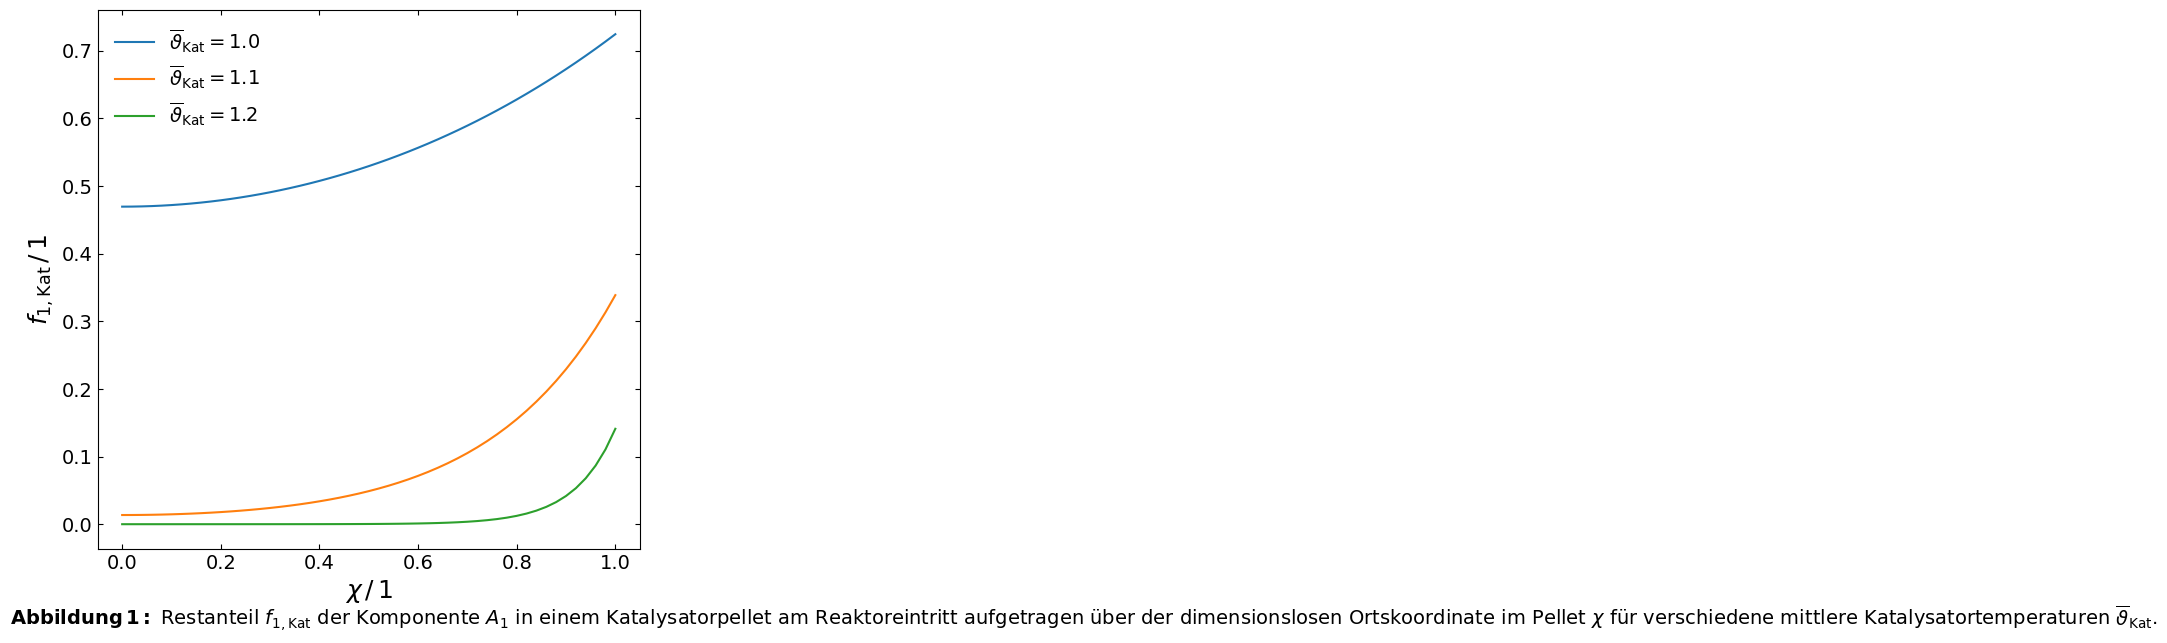

In [40]:
fig = plt.subplots(1, 1, figsize = (7,7))

plt.subplot(1,1,1)
for i in [0,1,2]:
    plt.plot(meso_ex[i].x, meso_ex[i].y[0], label = r'$\overline{\vartheta}_\mathrm{Kat}=%.1f$'%(T_cat_ex[i])) # plotting results
plt.tick_params(direction = 'in', right=True, left= True, bottom= True, top =True,labelsize=14) # setting ticks
plt.xlabel(r'$\chi\,/\,1$', fontsize = 18) # setting x-label
plt.ylabel(r'$f_\mathrm{1,Kat}\,/\,1$', fontsize=18) # setting y-label
plt.legend(frameon = False, fontsize = 14, title_fontsize = 14, loc = 'best') # adding legend, removing frame, adding title 
plt.figtext(0,0.0,r"$\mathbf{Abbildung\,1:}$ Restanteil $f_{1,\mathrm{Kat}}$ der Komponente $A_1$ in einem Katalysatorpellet am Reaktoreintritt aufgetragen über der dimensionslosen Ortskoordinate im Pellet $\chi$ für verschiedene mittlere Katalysatortemperaturen $\overline{\vartheta}_\mathrm{Kat}$.", fontsize=14, horizontalalignment='left') # subtitle to the figure 
plt.show()

Abbildung 1 trägt den Restanteil im Katalysatorpellet über die Pelletkoordinate auf. Der Konzentrationsgradient ist nahe der äußeren Oberfläche $\left(\chi=1\right)$ extremal und fällt zur Symmetrieachse $\left(\chi=0\right)$ hin ab. Dies entspricht dem erwarteten Verhalten.

## 3.2 Lösung der Makroskala

Die Funktion `solve_macroscale` löst das System an Bilanzgleichungen auf der Makroskala dynamisch mittels des Anfangswertsolvers `solve_ivp`. Die Argumente `f_0` sowie `T_0` werden als Anfangswerte bzw. Werte am Reaktoreintritt für den Restanteil und die Temperatur verwendet.

In [41]:
def solve_macroscale(f_0, T_0):
	""" solver function for macroscale

	Parameters
	----------
	f_0 : array
		initial residual fraction in 1
	T_0 : array
		initial temperature in 1

	Returns
	-------
	array of shape (2, N_disc_z, N_disc, t)
		solution hypermatrix
	"""
		
	## initial conditions
	# all initial values are set on the initial reactant concentration and initial temperature
	y_0_f    = np.zeros(N_disc_z)
	y_0_f[0] = f_0
	y_0_T    = np.ones(N_disc_z)
	y_0_T[0] = T_0
	y_0 = np.hstack((y_0_f, y_0_T)).ravel()
	
	# solve pde-system 
	res = solve_ivp(pde_system, theta_span, y0 = y_0, method = 'Radau', t_eval = theta_eval) # solving PDE with solve_ivp 
	
	# convergence check
	if not res.success == True:
		raise ValueError('Macroscale did not converge')
	
	c_x_t_sol = res.y.reshape(2, N_disc_z, N_disc_t) # extraction of solutions
	
	# negative value check
	s = c_x_t_sol.ravel() # hypermatrix is converted into a long vector
	for i in np.arange(0, s.size):
		if s[i]<0: # values in vector are checked to be smaller than 0
			raise ValueError('Values are smaller than 0!') # value error displayed for negative values
		
	return c_x_t_sol

In [42]:
c_x_t_sol = solve_macroscale(1, 1) # solving the macroscale for a inlet residual fraction of 1

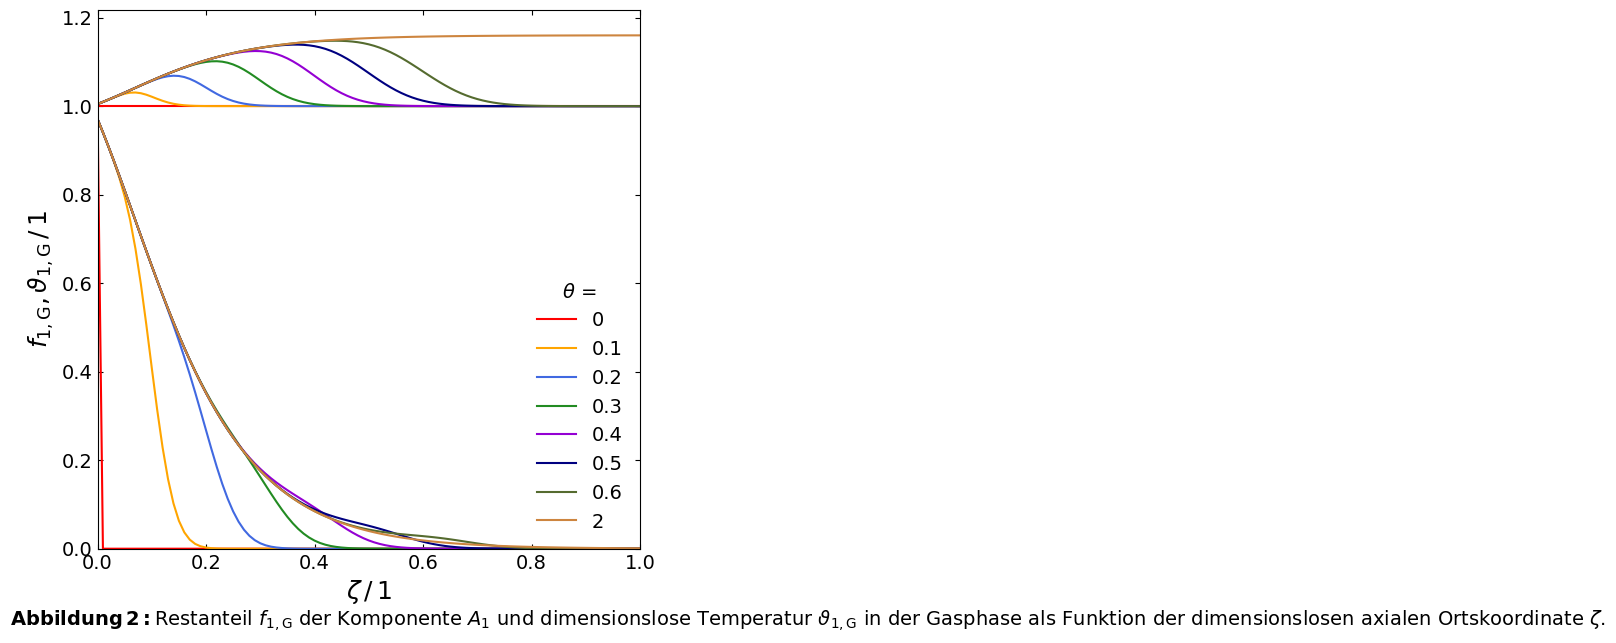

In [43]:
time_points = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 2] # definition of points in time

color_list = ['red', 'orange', 'royalblue', 'forestgreen', 'darkviolet', 'navy', 'darkolivegreen', 'peru', 'darkkhaki', 'yellow'] # definition of default colors

plt.subplots(figsize = (7,7))
for i in np.arange(0, len(time_points)):
    plt.plot(z, c_x_t_sol[0,:, int(time_points[i] / theta_max * (N_disc_t-1))], label = time_points[i], color = color_list[i]) # plotting results for residual fraction for different points in time
    plt.plot(z, c_x_t_sol[1,:, int(time_points[i] / theta_max * (N_disc_t-1))], color = color_list[i])  # plotting results for temperature for different points in time
plt.xlabel(r'$\zeta\,/\,1$', fontsize = 18) # setting x-label
plt.ylabel(r'$f_\mathrm{1,G},\vartheta_\mathrm{1,G}\,/\,1$', fontsize=18) # setting y-label
plt.xlim(z[0],z[-1]) # setting lower and upper limit for x-axis
plt.ylim(0) # setting lower limit for y-axis
plt.legend(frameon = False, title = r'$\theta$ = ', fontsize = 14, title_fontsize = 14, loc = 'best') # formatting legend
plt.tick_params(direction = 'in', right=True, left= True, bottom= True, top =True,labelsize=14) # setting ticks
plt.figtext(0,0.0,r"$\mathbf{Abbildung\,2:}$Restanteil $f_{1,\mathrm{G}}$ der Komponente $A_1$ und dimensionslose Temperatur $\vartheta_{1,\mathrm{G}}$ in der Gasphase als Funktion der dimensionslosen axialen Ortskoordinate $\zeta$.", fontsize=14, horizontalalignment='left') # subtitle to the figure 
plt.show()

In Abbildung 2 wird der Restanteil sowie dimensionslose Temperatur über den dimensionslosen Ort für unterschiedliche Zeitpunkte aufgetragen. Mit der Zeit schiebt sich die Front des Restanteils in Strömungsrichtung langsam durch den Reaktor. Mit ansteigendem Restanteil beschleunigt sich die Reaktionsgeschwindigkeit, wodurch sich auch ein Temperaturprofil ausbildet, das sich ebenfalls durch den Reaktor schiebt. Die konkreten Profile zu unterschiedlichen Zeitpunkten ergeben sich aus dem komplexen Zusammenspiel zwischen Konzentration (bzw. Restanteil), Temperatur und Reaktionsgeschwindigkeit. Nach langen Zeiten exisitiert kein Maximum im Temperaturprofil mehr, da ein adiabater Reaktor angenommen wird.

## 3.3 Stationäre Lösung

Für den stationären Fall ergibt sich sowohl für die Mesoskala wie auch die Makroskala ein Randwertproblem. Die definierten Funktionalitäten werden im Weiteren angepasst und gekoppelt. 

In [44]:
def solve_mesoscale_ss(f_k, T_cat_k):
    """ solver function mesoscale in steady-state

    Parameters
    ----------
    f_k : array
        residual fraction within the reactor in 1
    T_cat_k : array
        mean catalyst temperature in 1

    Returns
    -------
    array
        solution dictionary mesoscale steady-state
    """

    # define initial guess
    y_a_init = np.zeros((2, x_span.size))

    # adapt functions using partial
    catalyst_balances_adapted = partial(catalyst_balances, T_cat_k = T_cat_k)
    bc_adapted = partial(bc, f_k = f_k)

    # definition singularity matrix
    Ss = np.zeros((2,2))
    Ss[1,1] = - a
    
    # Call solver
    sol_flat = solve_bvp(catalyst_balances_adapted, bc_adapted, x_span, y_a_init, S = Ss) # solving boundary value problem
          
    return sol_flat


def ode_function(t, y):
    """ function for steady-state macroscale

	Parameters
	----------
	t : array
		time in 1
    y[0]: array
        residual fraction in 1
    y[1]: array
        dimensionless temperature in 1
    y[2]: array
        first derivative of residual fraction in 1
    y[3]: array
        first derivative of temperature in 1

	Returns
	-------
	array
        first and second order derivatives of residual fraction and temperature
	"""
    
    f = y[0] # transferring to local variable f
    T = y[1] # transferring to local variable T
    dfdt = y[2] # transferring to local variable f'
    dTdt = y[3] # transferring to local variable T'
    
    # first guess values
    f_cat_L = np.zeros(f.size)
    T_cat = np.ones(f.size)
   
    for k in np.arange(0, f.size):
        # 1. iteration
        sol_flat_1 = solve_mesoscale_ss(f[k], T_cat[k]) # solving mesoscale with guessed catalyst temperature
        T_cat[k]   = T_mean(sol_flat_1, T_cat[k], T[k]) # mean catalyst temperature

        # 2. iteration
        sol_flat_2 = solve_mesoscale_ss(f[k], T_cat[k]) # solving mesoscale with catalyst temperature after 1 iteration
        T_cat[k]   = T_mean(sol_flat_2, T_cat[k], T[k]) # mean catalyst temperature

        f_cat_L[k] = sol_flat_2.y[0,-1] # catalyst surface concentration

    d2fdt2 = Bo * (dfdt + (a+1)*(1-eps)/eps * ((Bi_m * Da)/phi**2) * (f - f_cat_L)) # mass balance macroscale
    d2Tdt2 = Pe * (dTdt + St * (T - T_cat)) # heat balance mesoscale

    return np.vstack((dfdt, dTdt, d2fdt2, d2Tdt2))


def bc_ss(ya, yb):
    """ boundary conditions function for steady-state macroscale

    Parameters
    ----------
    ya : array
        function values at left boundary
    yb : array
        function values at right boundary

    Returns
    -------
    array
        steady state boundary conditions macroscale
    """

    # left boundary conditions
    left_bc_f = -ya[2] + Bo * (ya[0] - 1) 
    left_bc_T = - ya[3] + Pe * (ya[1] - 1)

    # right boundary conditions
    right_bc_f = yb[2]
    right_bc_T = yb[3]

    return np.hstack((left_bc_f, left_bc_T, right_bc_f, right_bc_T))


def solve_macroscale_ss(some):
    """ solver function for steady-state macroscale

	Parameters
	----------
	some : array
		no entry

	Returns
	-------
	array of shape (2, N_disc_z, N_disc, t)
		solution hypermatrix
	"""
    
    # define initial guess
    y_a_init = np.zeros((4, z.size))
    y_a_init[1,:] = np.ones(z.size)

    # Call solver
    sol_flat = solve_bvp(ode_function, bc_ss, z, y_a_init) # solving boundary value problem

    # convergence check
    if not sol_flat.success == True:
        raise ValueError('Mesoscale did not converge')
    
    # negative value check
    s = sol_flat.y[0:2].ravel()
    for i in np.arange(0, s.size):
	    if s[i]<0:
		    raise ValueError('Values are smaller than 0!')
          
    return sol_flat

In [45]:
steady_state_solutions = solve_macroscale_ss(1) # solving macroscale

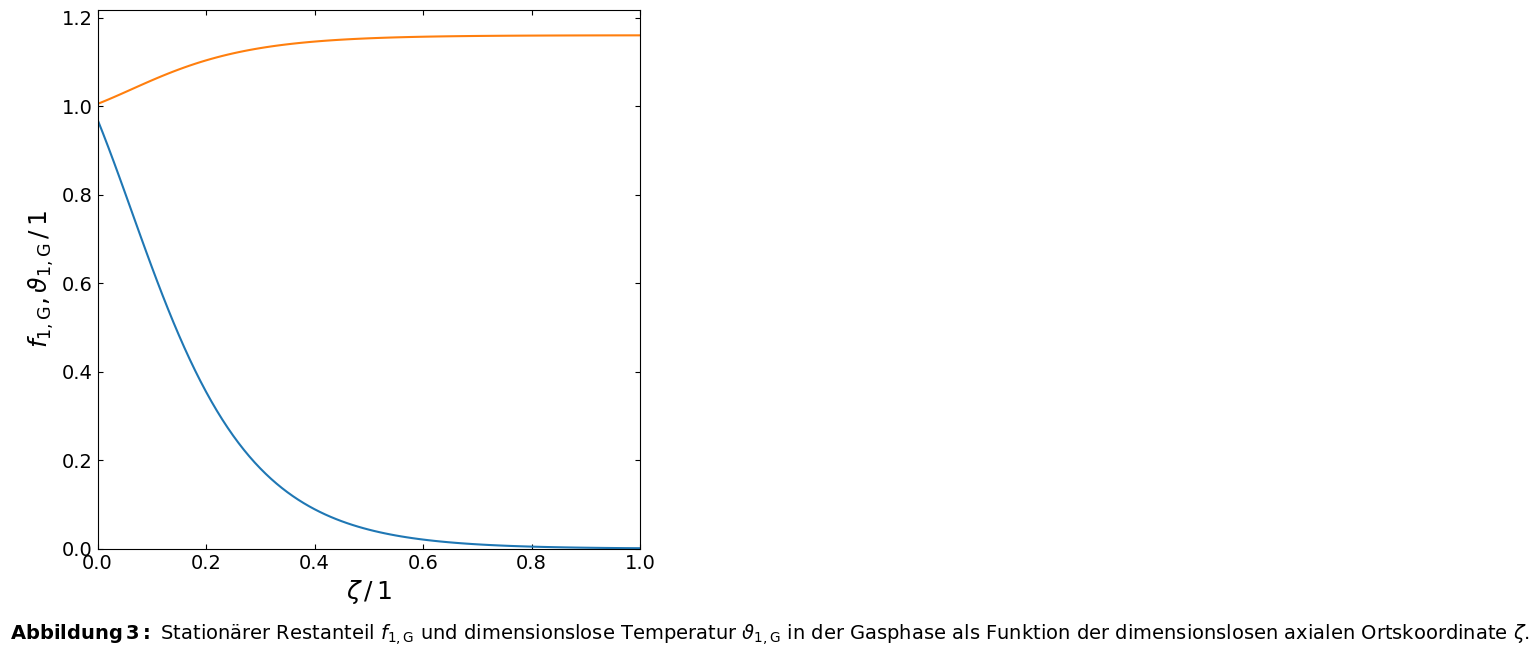

In [46]:
fig = plt.subplots(1,1, figsize=(7,7))

plt.subplot(1,1,1)
plt.plot(steady_state_solutions.x, steady_state_solutions.y[0]) # plotting results for residual fraction
plt.plot(steady_state_solutions.x, steady_state_solutions.y[1]) # plotting results for temperature
plt.ylabel(r'$f_\mathrm{1,G},\vartheta_\mathrm{1,G}\,/\,1$', fontsize=18) # setting y-label
plt.xlabel(r'$\zeta\,/\,1$', fontsize = 18) # setting x-label
plt.xlim(z[0],z[-1]) # setting lower and upper limit for x-axis
plt.ylim(0,) # setting lower limit for y-axis
plt.tick_params(direction = 'in', right=True, left= True, bottom= True, top =True,labelsize=14) # setting ticks
plt.figtext(0,-0.02,r"$\mathbf{Abbildung\,3:}$ Stationärer Restanteil $f_{1,\mathrm{G}}$ und dimensionslose Temperatur $\vartheta_{1,\mathrm{G}}$ in der Gasphase als Funktion der dimensionslosen axialen Ortskoordinate $\zeta$.", fontsize=14, horizontalalignment='left') # subtitle to the figure 
plt.show()

In Abbildung 3 wird der stationäre Restanteil sowie die dimensionslose Temperature über die dimensionslose Ortskoordinate im Reaktor aufgetragen. Für den stationären Fall fällt das Profil des Restanteils kontinuierlich zum Reaktoraustritt ab und die Temperatur steigt monoton hin zur Austrittstemperatur. 

# 4. Vergleich von dynamischer und stationärer Lösung

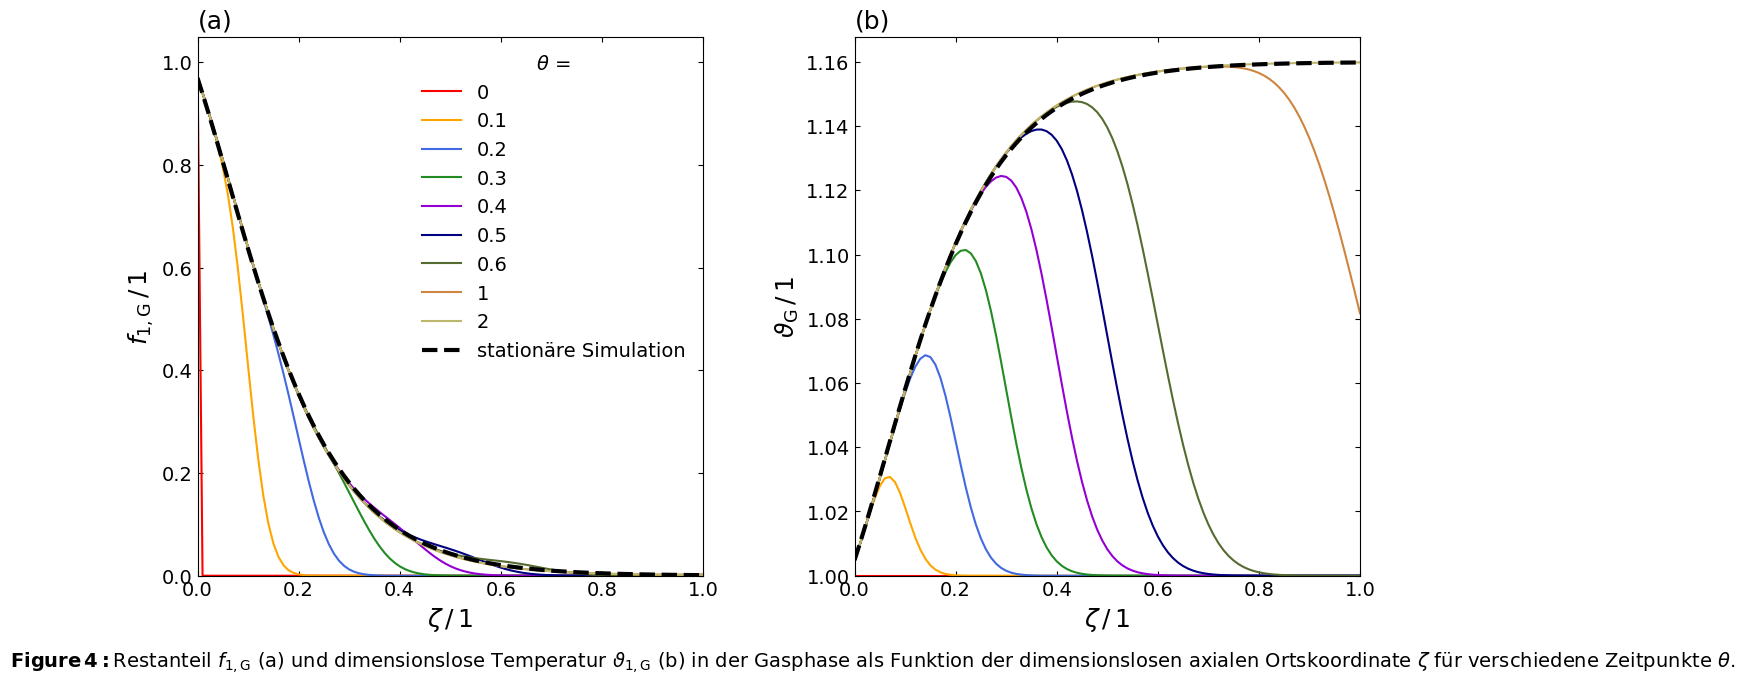

In [47]:
time_points = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 2] # points in time

fig = plt.subplots(1, 2, figsize = (15, 7))

plt.subplot(1,2,1)
for i in np.arange(0, len(time_points)):
    plt.plot(z, c_x_t_sol[0,:, int(time_points[i] / theta_max * (N_disc_t-1))], label = time_points[i], color = color_list[i]) # plotting residual fractions over axial coordinate for different points in time
plt.plot(steady_state_solutions.x, steady_state_solutions.y[0],'black',linewidth=3, linestyle= '--', label='stationäre Simulation') # plotting residual fractions  over axial coordinate in steady-state
plt.xlabel(r'$\zeta\,/\,1$', fontsize = 18) # setting x-label
plt.ylabel(r'$f_\mathrm{1,G}\,/\,1$', fontsize=18) # setting y-label
plt.title('(a)',loc='left', fontsize =18) # setting title of figure
plt.xlim(z[0], z[-1]) # setting lower and upper limit for x-axis
plt.ylim(0) # setting lower and upper limit for y-axis
plt.legend(frameon = False, title = r'$\theta$ = ', fontsize = 14, title_fontsize = 14, loc = 'best') # adding legend, removing frame, adding title 
plt.tick_params(direction = 'in', right=True, left= True, bottom= True, top =True,labelsize=14) # setting ticks

plt.subplot(1,2,2)
for i in np.arange(0, len(time_points)):
    plt.plot(z, c_x_t_sol[1,:, int(time_points[i] / theta_max * (N_disc_t-1))], label = time_points[i], color = color_list[i]) # plotting temperatures over axial coordinate for different points in time
plt.plot(steady_state_solutions.x, steady_state_solutions.y[1],'black', linewidth=3, linestyle= '--', label='stationäre Simulation')# plotting temperature over axial coordinate in steady-state
plt.ylabel(r'$\vartheta_\mathrm{G}\,/\,1$', fontsize=18) # setting label for y-axis
plt.xlabel(r'$\zeta\,/\,1$', fontsize = 18) # setting label for x-axis
plt.title('(b)',loc='left', fontsize =18) # setting title
plt.xlim(z[0], z[-1]) # setting lower and upper limits for x-axis
plt.ylim(1) # setting lower limit for y-axis
plt.tick_params(direction = 'in', right=True, left= True, bottom= True, top =True,labelsize=14) # setting ticks
plt.figtext(0,-0.02,r"$\mathbf{Figure\,4:}$Restanteil $f_{1,\mathrm{G}}$ (a) und dimensionslose Temperatur $\vartheta_{1,\mathrm{G}}$ (b) in der Gasphase als Funktion der dimensionslosen axialen Ortskoordinate $\zeta$ für verschiedene Zeitpunkte $\theta$.", fontsize=14, horizontalalignment='left') # subtitle to the figure 
plt.subplots_adjust(wspace=0.3) # adjusting distance between diagrams
plt.show()

Abbildung 4 kombiniert Abbildungen 2 und 3. Es zeigt sich, dass sich die Profile mit zunehmender Zeit dem stationären Zustand annähern. Bei $\theta=2$ ist der stationäre Zustand praktisch schon erreicht, da die Profile zu diesem Zeitpunkt praktisch den stationären Profilen entsprechen.

Bei genauem Vergleich mit dem Beispiel im Lehrbuch sind Unterschiede in den Profilen erkennbar. Diese lassen sich auf numerische Unterschiede zurückführen, da das Beispiel im Lehrbuch nicht mit Python erarbeitet wurde. Zur Validierung der Simulationsergebnisse ist letztlich der Vergleich mit geeigneten experimentellen Daten erforderlich. Für das Beispiel ist das allerdings eine nicht triviale Herausforderung.